# Tarea Clustering
## Ralphy Núñez Mercado

### ⬇️ Imports necesarios

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import plotly as py
import plotly.graph_objs as go


### ⌛ Preparar dataset 

In [300]:
df = pd.read_csv('shopping_trends.csv')

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [301]:
df.columns=['ID','Edad','Genero','Objeto Comprado','Categoria','Precio (USD)','Localizacion','Talla','Color','Estacion','Calificacion de la reseña','Estado de la subscripcion','Metodo de pago','Tipo de envio','Descuento aplicado','Uso codigo promocional','Compras anteriores','Metodo de pago preferido','Frecuencia de compra']

df

,ID,Edad,Genero,Objeto Comprado,Categoria,Precio (USD),Localizacion,Talla,Color,Estacion,Calificacion de la reseña,Estado de la subscripcion,Metodo de pago,Tipo de envio,Descuento aplicado,Uso codigo promocional,Compras anteriores,Metodo de pago preferido,Frecuencia de compra
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [302]:
df.describe()


,ID,Edad,Precio (USD),Calificacion de la reseña,Compras anteriores
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### 🔎 Buscnar valores nulos

In [303]:
df.isnull().sum()


ID                           0
Edad                         0
Genero                       0
Objeto Comprado              0
Categoria                    0
Precio (USD)                 0
Localizacion                 0
Talla                        0
Color                        0
Estacion                     0
Calificacion de la reseña    0
Estado de la subscripcion    0
Metodo de pago               0
Tipo de envio                0
Descuento aplicado           0
Uso codigo promocional       0
Compras anteriores           0
Metodo de pago preferido     0
Frecuencia de compra         0
dtype: int64

### Buscar valores duplicados

In [304]:
df.duplicated().sum()


np.int64(0)

### Procesar datos (Encodear y Estandarizar los datos)

In [305]:


# Inicializar el LabelEncoder y el StandardScaler
label_encoder = LabelEncoder()
scaler = StandardScaler()

# Codificar 'Precio (USD)' y normalizar las columnas relevantes
# df['Precio (USD)'] = label_encoder.fit_transform(df['Precio (USD)'])
# df_reducido = df[['Edad', 'Precio (USD)', 'Compras anteriores']]

# Normalizar las columnas seleccionadas
df_reducido = df[['Edad', 'Precio (USD)', 'Compras anteriores']].copy() 
# df_reducido[['Edad', 'Precio (USD)', 'Compras anteriores']] = scaler.fit_transform(df_reducido[['Edad', 'Precio (USD)', 'Compras anteriores']])

# Mostrar el DataFrame reducido con los cambios
df_reducido


,Edad,Precio (USD),Compras anteriores
0,55,53,14
1,19,64,2
2,50,73,23
3,21,90,49
4,45,49,31
...,...,...,...
3895,40,28,32
3896,52,49,41
3897,46,33,24
3898,44,77,24


### Método Elbow

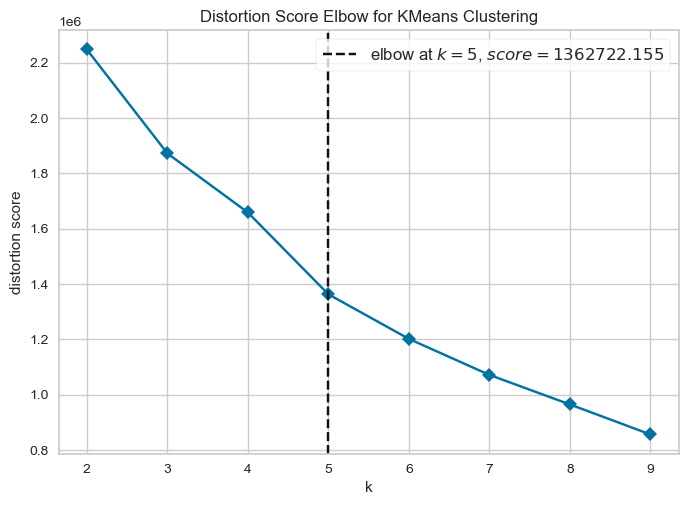

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [306]:
# Crear el modelo K-Means
model = KMeans(init='k-means++', random_state=42)

# Visualizador del codo
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

# Ajustar y mostrar el gráfico
visualizer.fit(df_reducido)
visualizer.show()

In [307]:
kmeans = KMeans(n_clusters=5, random_state=42, init='k-means++', n_init=10)


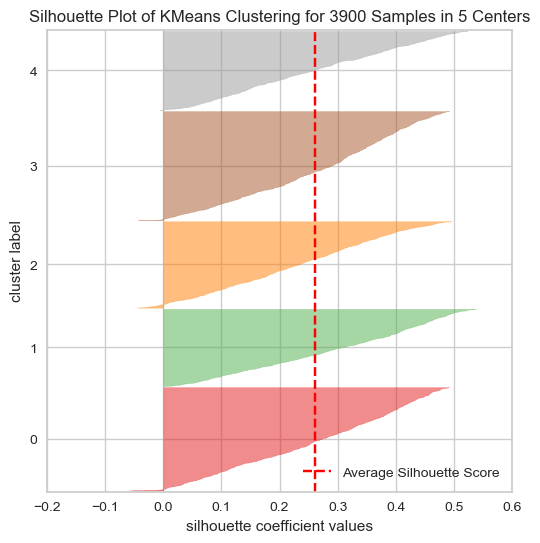

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 3900 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [308]:

# Crear la figura
fig, ax = plt.subplots(figsize=(6,6))

# Inicializar y ajustar el visualizador de silueta
visualizer = SilhouetteVisualizer(kmeans, ax=ax)
visualizer.fit(df_reducido.values)  # Convertir a NumPy array para evitar el warning
visualizer.show()

In [309]:
df_reducido = df_reducido[['Edad', 'Precio (USD)', 'Compras anteriores']].copy() 
df_reducido['Cluster'] = kmeans.fit_predict(df_reducido)


df_reducido

,Edad,Precio (USD),Compras anteriores,Cluster
0,55,53,14,3
1,19,64,2,2
2,50,73,23,1
3,21,90,49,4
4,45,49,31,3
...,...,...,...,...
3895,40,28,32,0
3896,52,49,41,3
3897,46,33,24,3
3898,44,77,24,2


In [310]:

# Asignar los clusters al DataFrame original
df['Cluster'] = df_reducido['Cluster']

# Visualización 3D
trace1 = go.Scatter3d(
    x=df['Edad'],
    y=df['Precio (USD)'],
    z=df['Compras anteriores'],
    mode='markers',
    marker=dict(
        color=df['Cluster'],
        size=10,
        line=dict(color=df['Cluster'], width=12),
        opacity=0.8
    )
)

layout = go.Layout(
    title='Clusters wrt Age, Gender, and Previous Purchases',
    scene=dict(
        xaxis=dict(title='Edad'),
        yaxis=dict(title='Precio (USD)'),
        zaxis=dict(title='Compras anteriores')
    )
)

fig = go.Figure(data=[trace1], layout=layout)
fig.show()


In [311]:
media_clusters = df[['Edad', 'Precio (USD)', 'Compras anteriores','Cluster']].groupby('Cluster').mean()
print("Media de los datos de los Clusters:")
print(media_clusters)

Media de los datos de los Clusters:
              Edad  Precio (USD)  Compras anteriores
Cluster                                             
0        31.617813     36.718151           22.298760
1        58.326778     81.888048           33.877458
2        41.672065     80.597841            9.983806
3        57.780514     39.108137           26.989293
4        30.165436     74.053176           35.587888


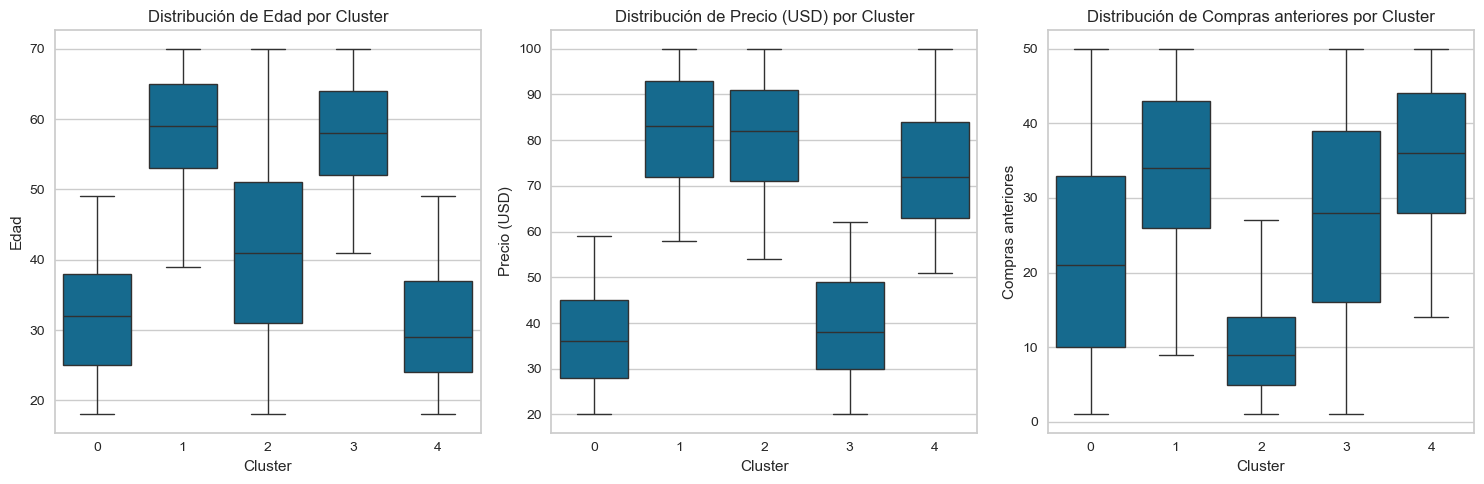

In [320]:
plt.figure(figsize=(15, 5))

# Excluir la columna 'Cluster' de la iteración
features = ['Edad', 'Precio (USD)', 'Compras anteriores']

for i, feature in enumerate(features):  
    plt.subplot(1, len(features), i+1)  # Ajustar según el número de características
    sns.boxplot(x='Cluster', y=feature, data=df_reducido)
    plt.title(f'Distribución de {feature} por Cluster')

plt.tight_layout()
plt.show()


## Análisis de Clusters

**Cluster 0:** Jóvenes (31.6 años) con compras moderadas (22.3) y bajo gasto (36.7 USD).  
**Cluster 1:** Adultos mayores (58.3 años) con alta frecuencia de compra (33.9) y alto gasto (81.9 USD).  
**Cluster 2:** Adultos de mediana edad (41.7 años) que gastan mucho (80.6 USD) pero compran poco (9.98).  
**Cluster 3:** Adultos mayores (57.8 años) con compras regulares (26.9) y bajo gasto (39.1 USD).  
**Cluster 4:** Jóvenes (30.1 años) con compras muy frecuentes (35.6) y alto gasto (74.0 USD).  
